# FYS-STK 4155 H20 PROJECT 1

## Definitions

In [1]:
from utils import *
from ols import *
from ridge import *
from lasso import *

/home/olav/anaconda3/envs/fys-stk4155/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
NOISE = .05
NUM_SAMPLES = 100
MAX_POLY_ORDER = 10
NUM_BOOTSTRAPS = 20
np.random.seed(0)

### OLS bias-variance tradeoff

In [3]:
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

polynomial_orders = list(range(MAX_POLY_ORDER+1))
ols_bs_df = run_ols_bootstrap(X, z, f, polynomial_orders=polynomial_orders, train_size=.7, bootstraps=NUM_BOOTSTRAPS)

print(best_r2(ols_bs_df["test_mse"], z))

0.8648190273651406


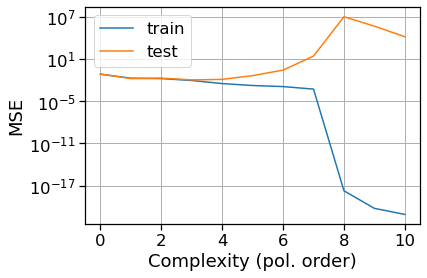

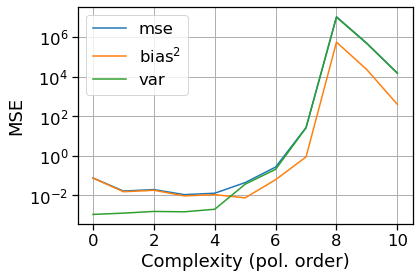

In [4]:
ax = ols_bs_df.plot(x="pol_order", y=["train_mse", "test_mse"], logy=True)
ax.legend(["train", "test"])
ax.set_xlabel("Complexity (pol. order)")
ax.set_ylabel("MSE")

ax.grid(True)
plt.show()

ax = ols_bs_df.plot(x="pol_order", y=["test_mse", "test_bias", "test_var"], logy=True)
ax.legend(["mse", "bias$^2$", "var"])
ax.set_xlabel("Complexity (pol. order)")
ax.set_ylabel("MSE")
#ax.set_xlim(0,15)
#ax.set_ylim(1E-4,1)
ax.grid(True)
plt.show()

## OLS with $k$-fold cross-validation resampling
The data is randomized, so we don't need to do that again.

### OLS train vs. test MSE

In [5]:
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, _, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

polynomial_orders = list(range(MAX_POLY_ORDER+1))
ols_k_df = run_ols_kfold(X, z, k=10, polynomial_orders=polynomial_orders)

print(best_r2(ols_k_df["test_mse"], z))

0.910185448299346


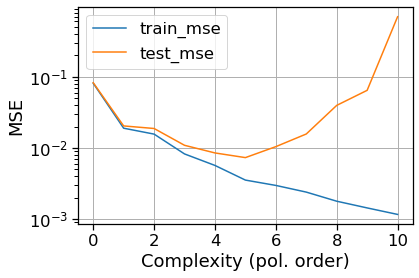

In [6]:
ax = ols_k_df.plot(x="pol_order", logy=True)
ax.set_xlabel("Complexity (pol. order)")
ax.set_ylabel("MSE")

ax.grid(True)
plt.show()

## Ridge with bootstrap resampling

### Ridge bias-variance tradeoff

In [7]:
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

lambdas = np.logspace(-4, 2, 50)
polynomial_orders = list(range(1,MAX_POLY_ORDER+1,1))

ridge_bs_df = run_ridge_bootstrap(X, z, f, polynomial_orders=polynomial_orders, lambdas=lambdas, train_size=.7, bootstraps=20)

In [8]:
pn = polynomial_orders[-1]
print(best_r2(ridge_bs_df[f"test_mse_{pn}"], z))

0.752227671622466


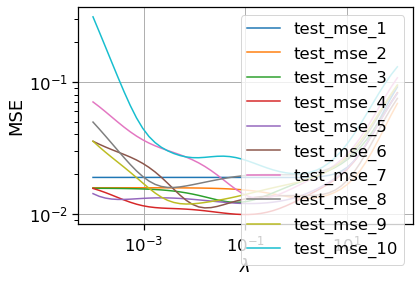

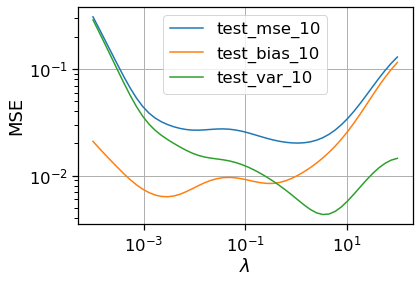

In [9]:
ax = ridge_bs_df.plot(x="lambda", y=[f"test_mse_{pn}" for pn in polynomial_orders], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)

ax = ridge_bs_df.plot(x="lambda", y=[f"test_mse_{pn}", f"test_bias_{pn}", f"test_var_{pn}"], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)

plt.show()

## Ridge with $k$-fold cross-validation resampling

### Ridge train vs. test MSE

In [10]:
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, var_eps = franke_sampler(x.T[0], y.T[0], noise=NOISE)

lambdas = np.logspace(-6, 2, 50)
polynomial_orders = list(range(1,MAX_POLY_ORDER+1,1))

ridge_k_df = run_ridge_kfold(X, z, k=10, polynomial_orders=polynomial_orders, lambdas=lambdas)

In [11]:
pn = polynomial_orders[-1]
print(best_r2(ridge_k_df[f"test_mse_{pn}"], z))

0.9039803188148938


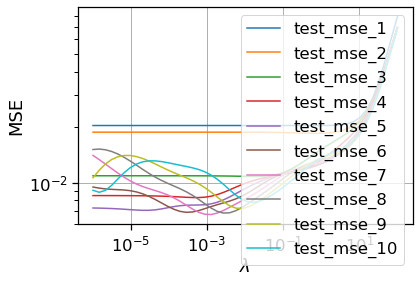

In [12]:
ax = ridge_k_df.plot(x="lambda", y=[f"test_mse_{pn}" for pn in polynomial_orders], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)

In [13]:
#plt.figure(figsize=(10,5))
#sns.heatmap(DataFrame(Vt.T @ np.linalg.inv(S**2 + L) @ S @ U.T))

In [14]:
#plt.figure(figsize=(10,5))
#sns.heatmap(DataFrame(Vt.T @ np.linalg.pinv(X_resampled)))

## LASSO with bootstrap resampling

In [15]:
#%%timeit -n1 -r1
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, _ = franke_sampler(x.T[0], y.T[0], noise=NOISE)

lambdas = np.logspace(-7, 0, 50)
polynomial_orders = list(range(1,MAX_POLY_ORDER+1, 1))
#polynomial_orders = [1,3,5,7,9]

skl_lasso_opts = {'max_iter':1E5, 'fit_intercept':False, 'warm_start':True, 'precompute':True, 'tol':.01, 'selection':'random', 'random_state':0}
lasso_bs_df = lasso_bootstrap(X, z, f, polynomial_orders=polynomial_orders, lambdas=lambdas, train_size=.7, bootstraps=20, **skl_lasso_opts)

In [16]:
pn = polynomial_orders[-1]
print(best_r2(lasso_bs_df[f"test_mse_{pn}"], z))

0.8091714793768374


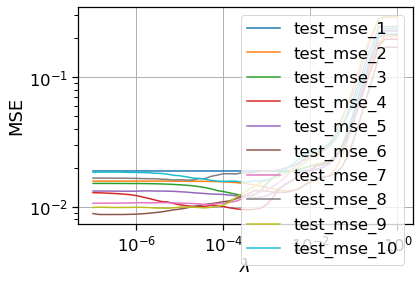

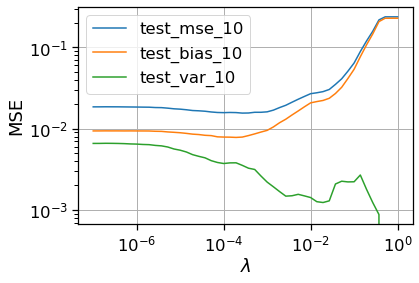

In [17]:

ax = lasso_bs_df.plot(x="lambda", y=[f"test_mse_{pn}" for pn in polynomial_orders], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)

pn = pn
ax = lasso_bs_df.plot(x="lambda", y=[f"test_mse_{pn}", f"test_bias_{pn}", f"test_var_{pn}"], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)

plt.show()

In [18]:
#%%timeit -n1 -r1
x, y = randmesh(sn=NUM_SAMPLES)
X = make_design_matrix(x, y, pn=MAX_POLY_ORDER)
z, f, var_eps = franke_sampler(x.T[0], y.T[0], noise=NOISE)

lambdas = np.logspace(-6, 0, 50)
polynomial_orders = list(range(1,MAX_POLY_ORDER+1, 1))
#polynomial_orders = [5,10,15]

skl_lasso_opts = {'max_iter':1E5, 'fit_intercept':False, 'warm_start':True, 'precompute':True, 'tol':.001, 'selection':'random', 'random_state':0}
lasso_k_df = lasso_kfold(X, z, k=10, polynomial_orders=polynomial_orders, lambdas=lambdas, **skl_lasso_opts)

In [19]:
pn = polynomial_orders[-1]
print(best_r2(lasso_k_df[f"test_mse_{pn}"], z))

0.9159706204152206


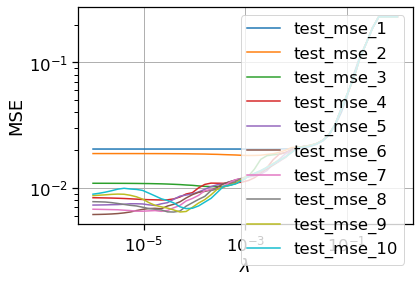

In [20]:
ax = lasso_k_df.plot(x="lambda", y=[f"test_mse_{pn}" for pn in polynomial_orders], logy=True, logx=True)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE")
ax.grid(True)